In [ ]:
!pip install emnist

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from emnist import extract_training_samples, extract_test_samples
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from PIL import Image
import io

In [ ]:
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [ ]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
CNN = Model(input_img, decoded)

In [ ]:
CNN.compile(optimizer=Adam(), loss=MeanSquaredError())

In [ ]:
CNN.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
975/975 [==============================] - 303s 310ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 2/10
975/975 [==============================] - 302s 310ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 3/10
975/975 [==============================] - 335s 344ms/step - loss: 0.0126 - val_loss: 0.0125
Epoch 4/10
975/975 [==============================] - 303s 311ms/step - loss: 0.0124 - val_loss: 0.0123
Epoch 5/10
975/975 [==============================] - 306s 314ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 6/10
975/975 [==============================] - 298s 306ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 7/10
975/975 [==============================] - 302s 309ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 8/10
975/975 [==============================] - 320s 328ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 9/10
975/975 [==============================] - 299s 307ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 10/10
975/975 [==============================] - 304s 312m

In [ ]:
denoised_images = CNN.predict(x_test_noisy)

650/650 [==============================] - 12s 19ms/step


Noised image => Original clean image => Denoised image


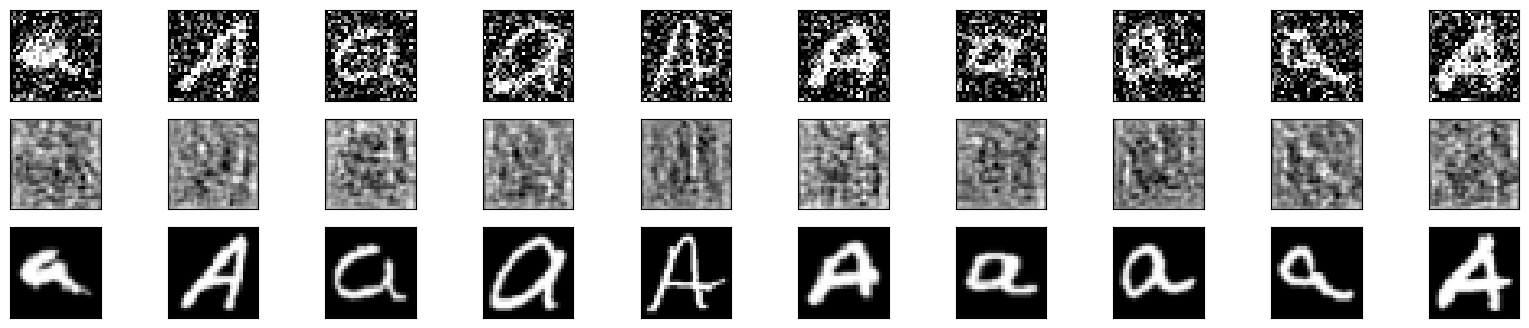

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
print("Noised image => Original clean image => Denoised image")
plt.show()
